In [37]:
import os
import math
import random
import warnings
import numpy as np
import pandas as pd 
from sklearn import metrics
from matplotlib import pyplot as plt
import seaborn as sns
warnings.filterwarnings("ignore")

In [38]:
# def plot_aa_count(data,filename):
#     res=dict()
#     for pep in list(data['PeptidesPassedNEHfilters.Peptide']):
#         for c in pep:
#             res[c.upper()]=res.get(c.upper(),0)+1
#     res=np.array(sorted(res.items(),key= lambda item:item[0],reverse=True))

#     plt.rc('font', size=14) 
#     plt.figure(figsize=(13,9))  

#     plt.barh(range(20),[int(x) for x in (res[:,1])],color='k',alpha=0.75)
#     plt.yticks(range(20),res[:,0])

#     for index, value in enumerate([int(x) for x in (res[:,1])]):
#         plt.text(value, index,
#                  str(value))

# #     plt.savefig(filename,dpi=900,bbox_inches='tight')
# #     plt.show()
# plot_aa_count(pd.read_csv(r"C:\Workplace\C#\Test\Test_test\ConsoleApp2\bin\Debug\mpe_1000.csv"),"mpe_aa_count.jpeg")
# plot_aa_count(pd.read_csv(r"C:\Workplace\C#\Test\Test_test\ConsoleApp2\bin\Debug\ape_1000.csv"),"ape_aa_count.jpeg")
# plot_aa_count(pd.read_csv(r"C:\Workplace\C#\Test\Test_test\ConsoleApp2\bin\Debug\asymp_1000.csv"),"asymp_aa_count.jpeg")

In [39]:
# plt.rc('font', size=14) 
# plt.figure(figsize=(16,10)) 
# def plot_aa_count(data,filename,offset=0):
#     color =['m','b','g'][offset]
#     label=[r"${N_{EH}},molecular\:percent\:enrichment\:of\:mass\:isotopomers$",
#            r"${N_{EH}},\:residual \:sum \:of \:squares$",
#            r"${N_{EH}},using\: the\: monoisotopic\: RIA\: at\: the\: plateau\: of\: labeling$"][offset]
#     res=dict()
#     for pep in list(data['PeptidesPassedNEHfilters.Peptide']):
#         visited=set()
#         for c in (pep):
#             if c not in visited:
#                 res[c.upper()]=res.get(c.upper(),0)+1
#                 visited.add(c)
#     res=np.array(sorted(res.items(),key= lambda item:item[1],reverse=False)) 
    
#     temp=range(0,80,4)
#     plt.bar([x+offset for x in temp],[int(x) for x in (res[:,1])],color=color,alpha=0.65,label=label)
#     plt.xticks([x+offset-1 for x in temp],res[:,0])

# #     for index, value in enumerate([int(x) for x in (res[:,1])]):
# #         plt.text(value, index,
# #                  str(value))

# #     plt.savefig(filename,dpi=900,bbox_inches='tight')
# #     plt.show()

# plot_aa_count(pd.read_csv(r"C:\Workplace\C#\Test\Test_test\ConsoleApp2\bin\Debug\ape_1000.csv"),"ape_aa_count.jpeg",1)
# plot_aa_count(pd.read_csv(r"C:\Workplace\C#\Test\Test_test\ConsoleApp2\bin\Debug\mpe_1000.csv"),"mpe_aa_count.jpeg",0)
# plot_aa_count(pd.read_csv(r"C:\Workplace\C#\Test\Test_test\ConsoleApp2\bin\Debug\asymp_1000.csv"),"asymp_aa_count.jpeg",2)
 

# plt.legend()
# plt.savefig("count_aa_eq.jpeg",dpi=900,bbox_inches='tight')

In [40]:
aa_sh_name={'Q':'Gln (Q)','N':'Asn (N)','S':'Ser (S)','G':'Gly (G)','T':'Thr (T)','A':'Ala (A)','D':'Asp (D)','P':'Pro (P)',
            'M':'Met (M)','V':'Val (V)','E':'Glu (E)','H':'His (H)','K':'Lys (K)','L':'Leu (L)','I':'Ile (I)','F':'Phe (F)',
            'C':'Cys (C)','Y':'Tyr (Y)','R':'Arg (R)','W':'Trp (W)',}

In [41]:
# data=pd.read_csv(r"C:\Workplace\C#\Test\Test_test\ConsoleApp2\bin\Debug\ape_mpe_aa.csv")
# data1=pd.read_csv(r"C:\Workplace\C#\Test\Test_test\ConsoleApp2\bin\Debug\asymp_aa.csv")

data=pd.read_csv(r"_data_mpe_ape_aa_2.csv")
data1=pd.read_csv(r"_data_asymp_aa_2.csv")

data=data.sort_values(by='AAsInfo.AA_NEH_tritium')
data1=data1.sort_values(by='AAsInfo.AA_NEH_tritium')

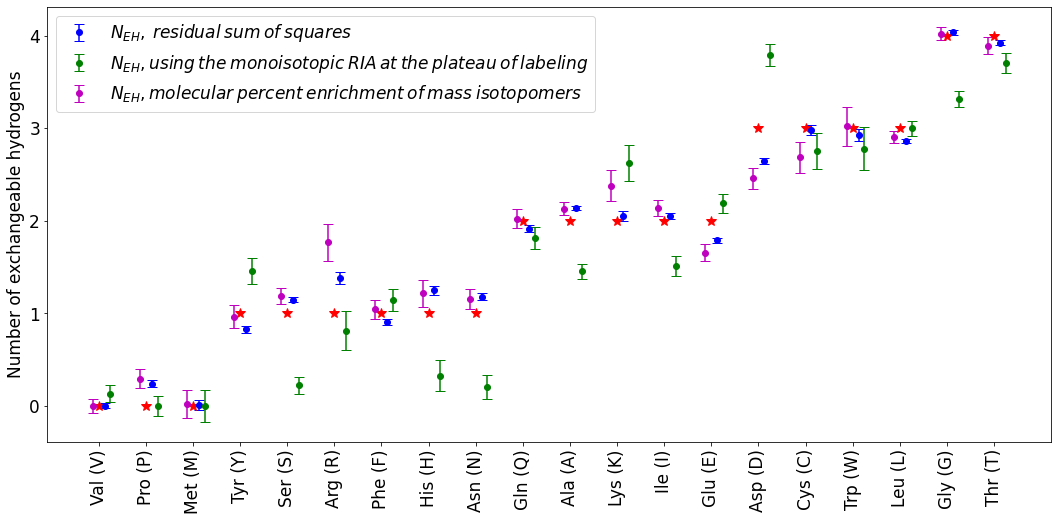

In [42]:
cis=[data['AAsInfo.AA_NEH_MPE_ci'],data['AAsInfo.AA_NEH_APE_ci'],data1['AAsInfo.AA_NEH_Asym_ci']]
aa_neh=[data['AAsInfo.AA_NEH_MPE'],data['AAsInfo.AA_NEH_APE'],data1['AAsInfo.AA_NEH_Asym']]

plt.rc('font', size=17) 
plt.rc('figure', figsize=(18,8)) 
plt.errorbar(range(0,80,4), data['AAsInfo.AA_NEH_tritium'], [0]*20,fmt ='*',mfc='r',color="r",ms=10)
cs=['m','b','g']
# label=['APE', 'MPE','Asymp']
label=[
       r"${N_{EH}},molecular\:percent\:enrichment\:of\:mass\:isotopomers$",
        r"${N_{EH}},\:residual \:sum \:of \:squares$",
       r"${N_{EH}},using\: the\: monoisotopic\: RIA\: at\: the\: plateau\: of\: labeling$"]


for i in [1,2,0]:# range(3):
    col=aa_neh[i]
    col_ci=cis[i] 
    if i ==0: k=-1
    else: k= i

#     print("============> ",col,"\t")
    plt.errorbar([x+0.5*k for x in range(0,80,4)], col, col_ci,
                 fmt ='o',mfc=cs[i],color=cs[i],ms=6,label=label[i],capsize=5)

# plt.xticks(range(0,80,4),data['AAsInfo.AA_name'],rotation=90)
plt.xticks(range(0,80,4),[aa_sh_name[x] for x in data['AAsInfo.AA_symbol']],rotation=90)

plt.ylabel("Number of exchangeable hydrogens")    

# plt.grid()
plt.legend()
plt.savefig("simulation_aa_neh_CI.jpeg",dpi=900,bbox_inches='tight')
plt.show()
